<a href="https://colab.research.google.com/github/wonyoung-ji/statistics/blob/master/study/200927_7%EC%9E%A5_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


__상관관계 분석의 종류__
- 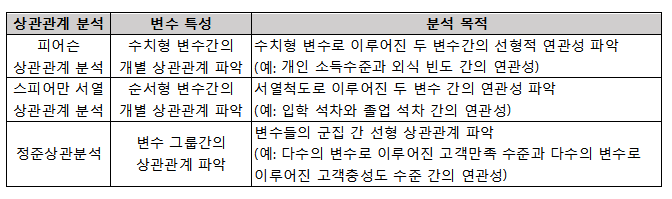

# 1.수치형 변수의 상관관계 분석: __피어슨__

## 1.1.개념 및 주요 이론
- __피어슨 상관관계 분석__: 수치형 변수로 이루어진 두 변수간의 선형적 연관성을 계량적으로 파악하기 위한 통계기법
- 두 변수간의 선형적 관계의 강도는 상관계수(𝑟)로 표현
- 단순 상관관계 분석: 상관관계 분석의 대상 변수가 2개인 경우
- 다중 상관관계 분석: 상관관계 분석의 대상 변수가 3개 이상인 경우
- 편(부분) 상관관계 분석: 다중 상관관계 분석에서 다른 변수들과의 관계는 고정, 두 변수만의 순수한 상관관계에 대한 강도를 나타냄

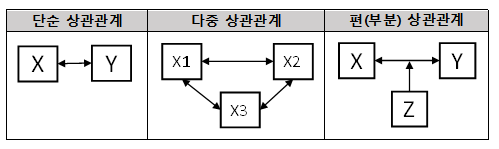

## 1.2.공분산과 상관계수
- 공분산(covariance): 두 변수의 선형적인 연관성의 정도. 각 변수의 편차곲 합계에 대한 평균
- 공분산이 양수일 경우 양의 선형관계, 음수일 경우 음의 선형관계
- 공분산으로 __상관관계의 방향성만__ 알 수 있음. 선형관계 정도 파악은 어려움

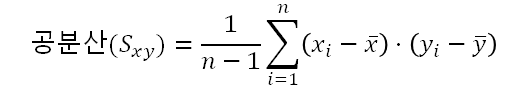

- 공분산의 단점(선형관계 정도 파악) 보완할 수 있는 지표가 상관계수(𝑟)
- 피어슨 상관계수는 공분산을 각 변수의 표준편차 곱으로 표준화 한 값. 측정 단위와는 무관하게 -1 ~ 1까지의 일정한 범위의 값을 가짐
- __선형관계에 대한 방향성뿐만 아니라 강도까지도__ 나타낼 수 있음

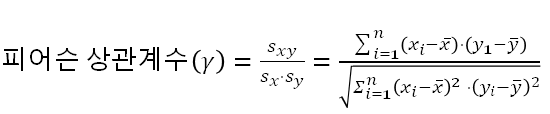

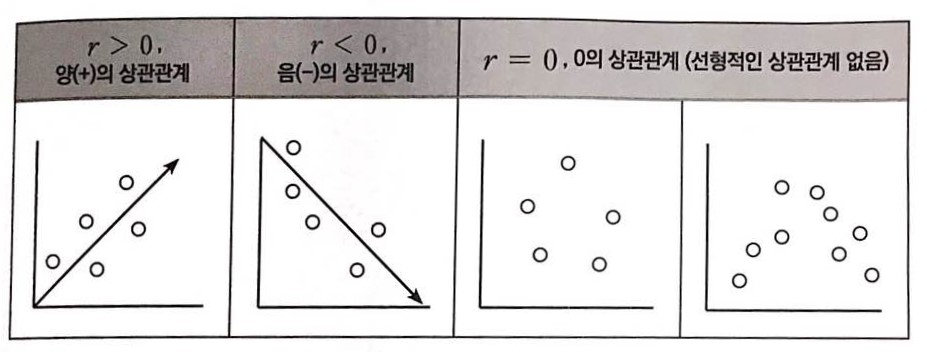

## 1.3.분석 및 해석
- 귀무가설 = 총 매출액과 방문빈도, 구매 카테고리 수 간의 선형적인 관계가 존재하지 않는다
- 연구가설 = 총 매출액과 방문빈도, 구매 카테고리 수 간의 선형적인 관계가 존재한다

In [2]:
import pandas as pd
from scipy import stats

df=pd.read_csv('/content/gdrive/My Drive/통계/Ashopping.csv', sep=',', encoding='CP949')
df1 = df[['총_매출액','방문빈도','구매_카테고리_수']]
df1.head()

,총_매출액,방문빈도,구매_카테고리_수
0,4007080,17,6
1,3168400,14,4
2,2680780,18,6
3,5946600,17,5
4,13745950,73,6


In [3]:
# pearsonr 함수 사용 피어슨 상관계수 출력
print(stats.pearsonr(df1.총_매출액,df1.방문빈도))
print(stats.pearsonr(df1.총_매출액,df1.구매_카테고리_수))
print(stats.pearsonr(df1.방문빈도,df1.구매_카테고리_수))

(0.6311706453193392, 3.0519604496887203e-112)
(0.3083469132396713, 1.8121422756812584e-23)
(0.3958607221846449, 7.345432750388936e-39)


- 두 변수간의 상관계수(r)과 p-value 출력
- __총 매출액-방문빈도는 양의 상관관계(0.63)__
- 총 매출액-구매카테고리수, 방문빈도-구매카테고리수는 낮은 상관관계
- p-value는 모두 0.0001이하
- 매출액을 강화시키기 위해서는 구매 카테고리 수를 증가시키기 보다는, __방문빈도를 증가시키도록__ 해야함

In [4]:
# corr 함수 사용 피어슨 상관계수 출력
df1 = df[['총_매출액','방문빈도','구매_카테고리_수']]
df1.corr(method='pearson')

,총_매출액,방문빈도,구매_카테고리_수
총_매출액,1.000000,0.631171,0.308347
방문빈도,0.631171,1.000000,0.395861
구매_카테고리_수,0.308347,0.395861,1.000000


- corr 함수의 경우 모든 변수를 한꺼번에 입력하여 테이블형태로 출력
- 단, pearsonr과는 다르게 유의확률을 출력하지 않음
- 순서형 변수의 경우 method에 'spearman' 입력

# 2.편(상관관계) 분석: __피어슨__

## 2.1.개념 및 주요 이론
- 또 다른 __제3의 변수가 두 변수의 연관성 자체에 영향을 줄 수 있음__
- 편(부분)상관관계 분석: 특정 변수의 영향을 제거한 상태에서의 두 변수간의 순수한 상관관계를 파악
- ex) 고객들의 일평균 통화량(분)과 데이터 사용량(MB)이 0.85이상의 매우 높은 상관관계 나타나더라도, \
 일평균 문자사용 횟수가 영향을 미친다고 판단될 경우, 이를 통제하여 통화량-데이터사용량 상관관계를 파악해야 함

## 2.2.편(부분)상관계수
- 제 3의 변수(z)를 통제해야 함
- x,y 각각에서 z에 의해 선형적으로 설명되는 부분을 제거하고 남은 잔차들간의 상관계수를 구해야 함
- __x를 종속변수, z를 독립변수로 하는 단순회귀분석에서의 잔차__와 \
__y를 종속변수, z를 독립변수로 하는 단순회귀분석에서의 잔차__ 를 구하고 \
__이 두 잔차들간의 상관계수__를 구하면 x, y 사이의 편 상관계수가 됨 

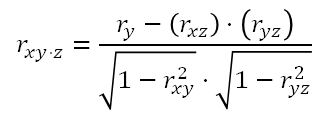

## 2.3.분석 및 해석
- 매출액과 방문빈도간의 상관관계는 구매 카테고리 수에 의해 영향을 받을 수 있다는 의견이 나옴
- 귀무가설 = 구매카테고리 수가 통제된 상황에서 총 매출액과 방문빈도 간에는 유의한 선형 관계를 갖지 않는다
- 연구가설 = 구매카테고리 수가 통제된 상황에서 총 매출액과 방문빈도 간에는 유의한 선형 관계를 갖는다

In [ ]:
! pip install pingouin

In [6]:
from pingouin import partial_corr
df1=df[['총_매출액','방문빈도','구매_카테고리_수']]
df1.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,총_매출액,방문빈도,구매_카테고리_수
0,4007080,17,6
1,3168400,14,4
2,2680780,18,6
3,5946600,17,5
4,13745950,73,6


In [7]:
partial_corr(data=df1,x='총_매출액',y='방문빈도',covar='구매_카테고리_수')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,1000,0.582794,"[0.54, 0.62]",0.339649,0.338324,5.054646e-92,2.242e+88,1.0


- covar = 통제하고자 하는 공변량 변수
- __z를 통제한 상태에서의 상관계수는 0.582__로 __통제전 상관계수인 0.631__보다는 작지만, 여전히 유의하다고 볼 수 있음
- 구매 카테고리 수를 전혀 고려하지 않는다면 방문빈도와 매출액간의 관계는 생각보다 크지 않음
- 마케팅 전략 수립 시 구매 카테고리 수를 고려할 필요가 있음


# 3.순서형 변수의 상관관계 분석: __스피어만__

## 3.1.개념 및 주요 이론
- 서열척도로 이루어진 변수들간의 상관관계 검정
- __스피어만 서열 상관관계 분석__: 순서형 변수의 상관관계 분석
- ex) 고객들의 구매액 기준 순위와 거래기간 기준 순위의 상관관계 \
고객들의 방문빈도 기준 순위와 구매액 기준 순위의 상관관계

## 3.2.스피어만 서열 상관계수
- 원래의 자료 값 대신, __자료 값들의 순위(rank)를 이용하여 상관계수를 구함__
- 두 수치형 변수간의 상관계수 =

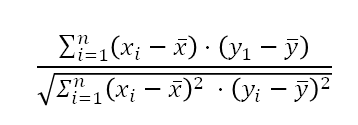

- x값들의 순위를 R1, R2.. Rn이라고 하고 y값들의 순위를 S1,S2..Sn이라고 하면,

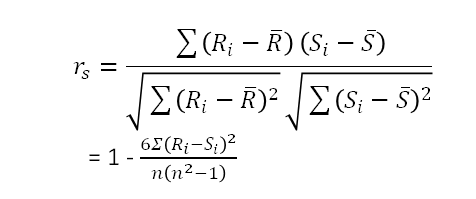

- 예를 들어 (x, y)로 주어지는 자료가 (1.5, 10), (2.3, 15), (3, 13)이라면 \
x값 1.5, 2.3, 3의 순위는 1,2,3이 되고, y값 10, 15, 13의 순위는 1, 3, 2 이므로 \
각각 (1,1), (2,3), (3,2)이 순위자료가 됨
- 이 순위라죠로 통상적인 상관계수를 구하면 스피어만의 순위상관계수가 됨
- 스피어만의 서열 상관계수 또한 -1 ~ 1 사이의 값을 가짐
- 1일 경우 두 변수의 서열이 완벽히 일치, -1일 경우 완전히 반대

## 3.3.분석 및 해석
- 고객들의 객단가 즉, 1회 평균매출액이 높은 고객 100명과 방문빈도가 높은 고객 100명을 선별하여 행사 기획
- 만약, 이 두 변수를 기준으로 순위를 선정하였을 때 선별된 고객들이 동질적이라면 두 가지 기준으로 고객을 추출하지 않아도 됨
- 귀무가설 = 쇼핑몰 고객들의 1회 평균 매출액 순위와 방문빈도 순위는 연관성이 없다
- 연구가설 = 쇼핑몰 고객들의 1회 평균 매출액 순위와 방문빈도 순위는 연관성이 있다

In [8]:
df1=df[['1회_평균매출액','방문빈도']]
df1.head()

,1회_평균매출액,방문빈도
0,235711,17
1,226314,14
2,148932,18
3,349800,17
4,188301,73


In [9]:
stats.spearmanr(df1['1회_평균매출액'],df1['방문빈도'])

SpearmanrResult(correlation=-0.4988411248473936, pvalue=4.929293870381245e-64)

- 지정된 데이터가 수치형일 경우 자동으로 순서형 척도로 변환하여 서열 상관계수를 출력
- 서열 상관계수 -0.498.. p-value 0.001 이하 값 출력
- 상관관계는 존재하지만, 음의 방향. 즉, 방문빈도가 높은 고객이 오히려 1회 평균 구매액 수준에서는 떨어짐
- 두 기준의 서열화된 고객목록이 상당히 달라질 것이므로, 행사를 기획할 때 두 가지 기준을 각각 적용하고 중복된 고객목록을 제거해야 함

# 4.정준상관분석

## 4.1.개념 및 주요 이론
- 정준상관분석: 변수 그룹 간의 선형 상관관계를 탐색하는 분석 방법
- ex) 업무특성(자율성, 다양성, 반응도) 변수그룹과 직무만족도(경력기여 만족도, 대인관계 만족도, 급여 만족도) 변수그룹 존재 \
업무특성 - 직무 만족도 그룹 사이의 상관관계 파악 및 __둘 사이의 상관성을 가장 잘 표현해주는 요인변수들의 선형 결합__을 찾음
- 정준상관분석에 사용되는 모든 변수들은 원칙적으로 __연속형변수__이어야 함
- 범주형 변수일 경우 더미 변수화하여 분석에 적용


## 4.2.정준상관모형

- __정준변수__: 개별 변수들의 선형결합으로 이루어진 그룹 X와 Y
- __정준상관계수__: 정준변수 X와 Y 사이의 상관계수 p
- __정준계수__:정준변수간 상관계수를 최대화 시키는 선형결합을 나타내는 계수
- __제1 정준상관계수__: 정준변수간 상관계수가 최대일 때의 계수(정준계수 중 최고 영향)
- 통상적으로 제1 정준계수의 결과만으로 두 변수 그룹간의 관계를 잘 설명


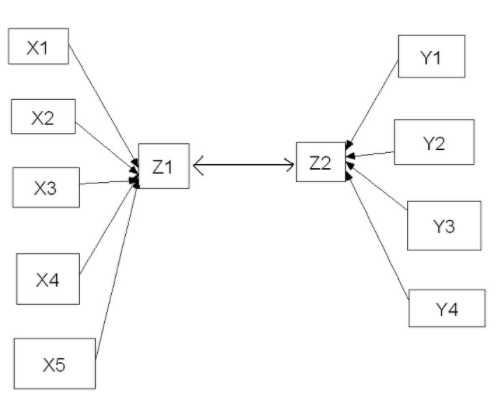

- Z1, Z2 간의 상관계수를 가장 크게 만드는 Z1, Z2를 찾아 해석하는 것이 목표
- 정준변수 = Z1, Z2


- __정준적재량__: 정준변수와 해당 정준변수를 구성하는 측정변수들 사이의 상관계수
 - ex) Z1을 구성하는 X1,...X5의 값들 사이의 상관계수
- __정준교차량__: 정준변수와 대립하는 정준변수의 측정변수들 사이의 상관계수
 - ex) Z1을 구성하는 X1,...X5의 값과 Z2를 구성하는 Y1,...Y4의 값들 사이의 상관계수

## 4.3.분석 및 해석
- 쇼핑몰 제품만족도(가격, 디자인, 품질만족도)와 매장만족도(직원서비스, 매장시설, 고객관리변수)에 대한 설문조사 실시
- 귀무가설 = 제품만족도는 매장만족도와 연관성이 없다
- 연구가설 = 제품만족도는 매장만족도와 유의한 상관관계를 가지고 있다.

In [12]:
from sklearn.cross_decomposition import CCA
df = pd.read_csv('/content/gdrive/My Drive/통계/CCA.csv',sep=',',encoding='CP949')
df.head()

,품질,가격,디자인,직원 서비스,매장 시설,고객관리
0,8,10,71,72,9,27
1,83,21,94,63,7,77
2,81,62,74,96,7,32
3,75,74,98,96,3,55
4,34,76,98,84,6,95


In [14]:
U = df[['품질','가격','디자인']]
V = df[['직원 서비스','매장 시설','고객관리']]
print(U.head())
print('-'*50)
print(V.head())

   품질  가격  디자인
0   8  10   71
1  83  21   94
2  81  62   74
3  75  74   98
4  34  76   98
--------------------------------------------------
   직원 서비스  매장 시설  고객관리
0      72      9    27
1      63      7    77
2      96      7    32
3      96      3    55
4      84      6    95


In [18]:
# 정준변수 구하기
cca = CCA(n_components=1).fit(U,V)
U_c, V_c = cca.transform(U,V)
print(U_c)
print('-'*50)
print(V_c)

[[-0.55451512]
 [-0.12301628]
 [ 0.40708859]
 [ 1.4861872 ]
 [ 1.8393597 ]
 [-0.18638005]
 [-0.47604906]
 [-1.10459412]
 [-0.72231536]
 [ 0.02423555]
 [-0.69744765]
 [ 0.54958654]
 [-0.8098459 ]
 [ 0.36770595]]
--------------------------------------------------
[[-0.29828858]
 [ 0.51338449]
 [ 0.95000731]
 [ 1.76514223]
 [ 1.81062484]
 [-0.74632557]
 [-1.67676657]
 [-1.00578133]
 [-1.40361614]
 [ 1.38766197]
 [-1.28827534]
 [-0.3120564 ]
 [ 0.23113188]
 [ 0.07315722]]


- n_components = 각 변수 그룹을 몇 개의 요인으로 할당하여 정준상관계수를 구할 것인지 설정. 최대 3까지 설정가능
  - 제품만족도, 매장만족도 라는 각각 1개의 요인으로 묶어 두 그룹 간의 관계를 보고자하는 것이므로 1
- __CCA()__ 함수를 사용하여 정준상관모형 학습 후, 실제 데이터에 적용하기 위해 __fit()__함수에 U, V 입력
- 정준변수를 출력하기 위해 __transform()__ 함수를 사용. U, V를 목표 정준변수 변수그룹에 입력 후 리턴 값은 각각 U_c, V_c에 받음
- 실습데이터는 총 14개의 샘플 존재하므로 14번의 선형결합을 통해 총 14개의 정준변수값 출력. 이를 U_c1, V_c1에 할당

In [20]:
# 정준변수 DF로 출력
U_c1=pd.DataFrame(U_c)[0]
V_c1=pd.DataFrame(V_c)[0]
print(U_c1)
print('-'*50)
print(V_c1)

0    -0.554515
1    -0.123016
2     0.407089
3     1.486187
4     1.839360
5    -0.186380
6    -0.476049
7    -1.104594
8    -0.722315
9     0.024236
10   -0.697448
11    0.549587
12   -0.809846
13    0.367706
Name: 0, dtype: float64
--------------------------------------------------
0    -0.298289
1     0.513384
2     0.950007
3     1.765142
4     1.810625
5    -0.746326
6    -1.676767
7    -1.005781
8    -1.403616
9     1.387662
10   -1.288275
11   -0.312056
12    0.231132
13    0.073157
Name: 0, dtype: float64


In [21]:
# 정준상관계수 구하기
CC1 = stats.pearsonr(U_c1,V_c1)
CC1

(0.7717687943183485, 0.00122266701923902)

In [26]:
# 정준적재량, 교차적재량 구하기
import numpy as np
print('제품만족도 정준변수와 해당 변수들간 정준적재량', np.corrcoef(U_c1.T,U.T)[0,1:4])
print('제품만족도 정준변수와 매장만족도 변수들간 교차적재량', np.corrcoef(U_c1.T,V.T)[0,1:])
print('매장만족도 정준변수와 해당 변수들간 정준적재량', np.corrcoef(V_c1.T,V.T)[0,1:])
print('매장만족도 정준변수와 제품만족도 변수들간 정준적재량', np.corrcoef(V_c1.T,U.T)[0,1:4])

제품만족도 정준변수와 해당 변수들간 정준적재량 [0.35045604 0.77461847 0.55191153]
제품만족도 정준변수와 매장만족도 변수들간 교차적재량 [ 0.70598452 -0.0438384   0.5889048 ]
매장만족도 정준변수와 해당 변수들간 정준적재량 [ 0.91476168 -0.0568025   0.76305858]
매장만족도 정준변수와 제품만족도 변수들간 정준적재량 [0.27044132 0.5978383  0.42592516]


- 피어슨 상관계수를 구해주는 corrcoef() 함수 사용
- 한 번에 한 쌍의 변수에 대한 상관계수를 구하는 pearsonr()과는 달리, 여러 개 변수에 대한 상관계수를 구할 수 있음
- corrcoef(data1, data2)를 적용하였을 때, 현재 data1에는 정준변수 1개, data2에는 측정변수 3개 들어있으므로 총 4개의 상관계수 출력

- CC1의 값을 보면, 제1정준상관계수 0.77, p-value는 0.01 이하
- 정준적재량을 통해, 제품만족도의 경우 가격과 디자인이, 매장만족도의 경우 직원서비스와 고객관리가 큰 영향을 주고 있음을 알 수 있음
- 교차적재량을 통해 제품만족도는 매장만족도의 직원서비스, 고객관리에 의해, 매장만족도는 제품만족도의 가격, 디자인에 의해 결정됨을 알 수 있음
- 그러므로 쇼핑몰은 고객만족을 위해서 품질<가격+디자인, 직원들에 대한 교육, 현장직원들의 고객관리 업무에 대한 교육이 중요함

